<a href="https://colab.research.google.com/github/viktory-41/rosnich_kompany_velikobrit/blob/main/onl_rozn_velicobr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Это набор транзакционных данных, содержащий все транзакции, совершенные в период с 01.12.2010 по 09.12.2011 зарегистрированной в Великобритании онлайн-розничной компанией, не имеющей розничных магазинов.  Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании — оптовые торговцы. https://archive.ics.uci.edu/dataset/352/online+retail

InvoiceNo: Номер счета-фактуры. Номинальный, 6-значный целочисленный номер, уникально присваиваемый каждой транзакции. Если этот код начинается с буквы «с», это означает аннулирование. StockCode: Код товара (наименования). Номинальный, 5-значный целочисленный номер, уникально присваиваемый каждому отдельному товару. Description: Название товара (наименования). Номинальный. Quantity: Количество каждого товара (наименования) в одной транзакции. Числовое значение. InvoiceDate: Дата и время выставления счета. Числовое значение, день и время создания каждой транзакции. UnitPrice: Цена за единицу. Числовое значение, цена товара за единицу в фунтах стерлингов. CustomerID: Номер клиента. Номинальный, 5-значный целочисленный номер, уникально присваиваемый каждому клиенту. Country: Название страны. Номинальное значение, название страны, в которой проживает каждый клиент.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df.shape

(541909, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Мы видим, что у нас имеется 8 признаков, из которых 4 категориальных, 1 целочисленный, 2  вещественных и 1 временной

In [22]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Заметим, что для CustomerID имеются пустые ячейки, скорее всего это не зарегистрированные пользователи. Рассмотрим нулевые объекты.

In [23]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


По выведенным данным видим, что Description: Название товара (наименования) и CustomerID: Номер клиента имеют пропущенные значения. Так как номера клиентов, мы не сможем обновить каким-либо усреднением, то их придется удалить.

In [24]:
df=df.dropna(subset=['CustomerID'])

In [25]:
df.shape

(406829, 8)

In [26]:
df['CustomerID']=df['CustomerID'].astype('int64')
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [27]:
df.shape

(406829, 8)

<Axes: >

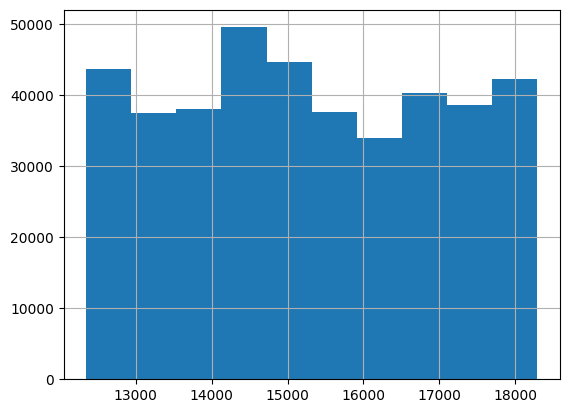

In [28]:
df['CustomerID'].hist()

<Axes: >

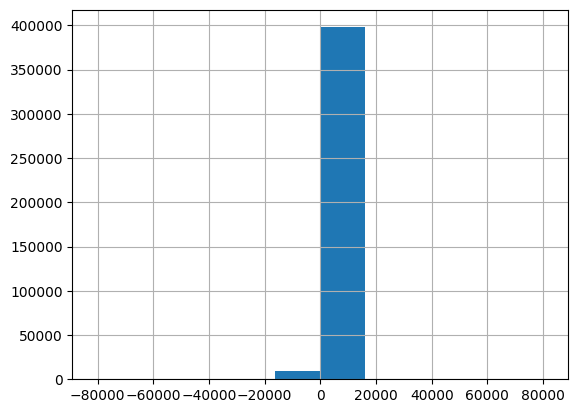

In [29]:
df['Quantity'].hist()

<Axes: >

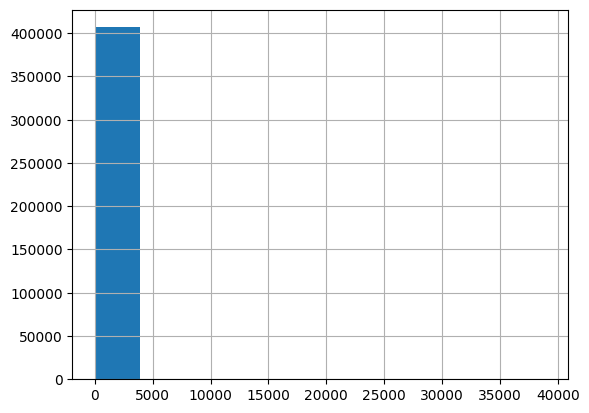

In [30]:
df['UnitPrice'].hist()

обратим внимание, что Quantity у некоторых продуктов меньше 0. Так как это признак показывает Количество каждого товара (наименования) в одной транзакции, то вероятно это отказ от товара. Нам же нужны данные которые были выкупленыи оставлены, поэтому отрицательные Quantity нужно убрать.

In [31]:
df[df['UnitPrice']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [32]:
df[df['Quantity']<0].shape

(8905, 8)

In [33]:
df[df['Quantity']>0].shape

(397924, 8)

In [34]:
df[df['Quantity']<0].shape[0]/df[df['Quantity']>0].shape[0]*100

2.237864516842412

Видим, что было произведено 8905 отказов. Что составляет 2.23 % от общего колчиества заказов.

In [35]:
df=df[df['Quantity']>0]

In [ ]:
df.shape

(397924, 8)

In [ ]:
df.head()

In [ ]:
df.duplicated().sum()

Новый признак по сумме всего чека TotalPrice. А также введен колонку с датой, без времени.

In [ ]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']


In [ ]:
df['Date']=df['InvoiceDate'].dt.date
df.head()

In [ ]:
df['CustomerID'].nunique()

RFM-**анализ**

RFM-анализ — метод сегментации клиентов компании, основанный на трёх ключевых показателях потребительского поведения: Recency (давность), Frequency (частота) и Monetary (сумма покупок). Аббревиатура RFM расшифровывается как Recency, Frequency и Monetary.
Будем считать эту метрику для каждого пользователя.


Определим временя, возьмем максимальное из всей колонки +1 день.

In [ ]:
import datetime as dt
date_now = df['InvoiceDate'].max()+dt.timedelta(days=1)
date_now

In [ ]:
Recency=(date_now-df.groupby('CustomerID')['InvoiceDate'].max()).dt.days
Recency.head()

Это мы просмотрели давность последней покупки каждого пользователя.

In [ ]:
Frequency = df.groupby('CustomerID')['InvoiceDate'].nunique()
Frequency.head()

Frequency (F): Общее количество заказов (уникальных чеков) у клиента

In [ ]:
Monetary=df.groupby('CustomerID')['TotalPrice'].sum()
Monetary.head()

Monetary (M): Сумма всех покупок клиента.

In [ ]:
rfm_df= pd.DataFrame({'Recency':Recency,'Frequency':Frequency, 'Monetary':Monetary}).reset_index()
rfm_df.head()

Recency: Чем меньше дней прошло (ближе к сегодня), тем лучше. Ставим оценку 5 тем, кто покупал недавно.

Frequency: Чем больше заказов, тем лучше (5 — лучшие).

Monetary: Чем больше потратил, тем лучше (5 — лучшие).

In [ ]:
rfm_df['R_rank']=pd.qcut(rfm_df['Recency'], q=5, labels=[5,4,3,2,1])
rfm_df['F_rank']=pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_df['M_rank']=pd.qcut(rfm_df['Monetary'], q=5, labels=[1,2,3,4,5])
rfm_df['RFM_Score'] = rfm_df['R_rank'].astype(str) + rfm_df['F_rank'].astype(str) + rfm_df['M_rank'].astype(str)
rfm_df['Total_Score'] = rfm_df['R_rank'].astype(int) + rfm_df['F_rank'].astype(int) + rfm_df['M_rank'].astype(int)
rfm_df.head()

In [ ]:
rfm_df.shape

In [ ]:
rfm_df['Total_Score'].describe()

По таблице вы видим, что минимум это рейтинг пользователя 3, максимум 15

Преобразуем рейтинги отдельных признаков в числовые переменные


In [ ]:
rfm_df['F_rank']=rfm_df['F_rank'].astype('int')
rfm_df['R_rank']=rfm_df['R_rank'].astype('int')
rfm_df['M_rank']=rfm_df['M_rank'].astype('int')

In [ ]:
rfm_df.info()

In [ ]:
rfm_df['Total_Score'].hist()

VIP (Чемпионы): Счет 13-15 (в сумме) — часто покупают, много тратят.

Лояльные: Счет 10-12.

Потенциальные (Новички): Счет 8-9 (часто имеют высокий R, но низкие F и M).

Спящие (Риск потери): Счет 5-7.

Ушедшие: Счет 3-4.

Рассмотрим более подробно на категории, как внутри они распределяются между R, F and M.

  VIP (Чемпионы) Счет 13-15 (в сумме)

1.   Часто покупают, много тратят и относительно недавно делали последний заказ (живые клиенты)




In [ ]:
segm_1=rfm_df[(rfm_df['Total_Score']<=15) & (rfm_df['Total_Score']>=13)][['F_rank','R_rank','M_rank']].hist()
segm_1

Лояльные: Счет 10-12


1.   Заходили в последний раз позже, чем Вип-клиенты, менее чаще делают покупки, но хорошо выплачивают товар.




In [ ]:
segm_2=rfm_df[(rfm_df['Total_Score']<=12) & (rfm_df['Total_Score']>=10)][['F_rank','R_rank','M_rank']].hist()

Потенциальные (Отдельные люди, готовящиеся к какому-либо празднику): Счет 8-9 \
Так как заходили давно на пике, заказывали умерено, скорее всего самое необходимое, и выплачивали тоже умерено.

In [ ]:
segm_3=rfm_df[(rfm_df['Total_Score']<=9) & (rfm_df['Total_Score']>=8)][['F_rank','R_rank','M_rank']].hist()

Спящие (Риск потери): Счет 5-7.
Заходили очень давно, заказы были не частые и приносили низкую прибыль. Вреоятно пользователи, которые опробывали сайт.

Предпринять решение для возобновления интереса к платформе, возможно предлагать более низкий по стоимости товар и на определнные события.

In [ ]:
segm_4=rfm_df[(rfm_df['Total_Score']<=7) & (rfm_df['Total_Score']>=5)][['F_rank','R_rank','M_rank']].hist()

Ушедшие: Счет 3-4.
Неактивные пользователи платформы.

In [ ]:
segm_5=rfm_df[(rfm_df['Total_Score']<=4) & (rfm_df['Total_Score']>=3)][['F_rank','R_rank','M_rank']]
segm_5

In [ ]:
segment=pd.DataFrame({'segm_1':segm_1,'segm_2':segm_2,'segm_3':segm_3,'segm_4':segm_4,'segm_5':segm_5})

**Визуализация**

In [ ]:
plt.bar(df['Description'].head(10), height=0.5, )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру
plt.figure(figsize=(12, 8))

# Строим scatter plot
sns.scatterplot(
    data=rfm_df,
    x='Frequency',
    y='Monetary',
    hue='segment',  # раскрашиваем по сегментам
    palette='viridis',  # цветовая палитра (можно 'Set1', 'coolwarm', 'tab10')
    alpha=0.6,  # прозрачность для лучшей читаемости
    s=100  # размер точек
)

# Настройка осей (важно для Monetary - там большие значения)
plt.title('Распределение клиентов: Частота покупок vs Сумма затрат', fontsize=16, pad=20)
plt.xlabel('Frequency (количество заказов)', fontsize=12)
plt.ylabel('Monetary (общая сумма затрат, £)', fontsize=12)

# Легенда
plt.legend(title='Сегмент клиента', title_fontsize=11, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Сетка для лучшей читаемости
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()